In [176]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [177]:
# import csv file
df = pd.read_csv('pharma_ecommerce_data.csv', encoding= 'unicode_escape')
df.shape

(11251, 17)

In [178]:
df.head(10)

,User_ID,Product_ID,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Clicks,Orders,Amount,Status,Cart_Abandonment_Rate,unnamed1
0,1002903,P00125942,Sanskriti,Female,26-35,28,Married,Maharashtra,Western,Healthcare,Painkillers,48,0,544.000,Completed,100.00,NaN
1,1000732,P00110942,Kartik,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Diabetes Care,31,3,2155.960,Completed,90.32,NaN
2,1001990,P00118542,Bindu,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Painkillers,45,2,2153.630,Cancelled,95.56,NaN
3,1001425,P00237842,Sudevi,Male,0-17,16,Married,Karnataka,Southern,Construction,Skin Care,42,5,2152.430,Cancelled,88.10,NaN
4,1000588,P00057942,Joni,Male,26-35,28,Married,Gujarat,Western,Food Processing,Painkillers,35,4,2149.290,Cancelled,88.57,NaN
5,1000588,P00057942,Joni,Male,26-35,28,Single,Himachal Pradesh,Northern,Food Processing,Diabetes Care,10,1,2387.700,Cancelled,90.00,NaN
6,1001132,P00018042,Balk,Female,18-25,25,Married,Uttar Pradesh,Central,Lawyer,Painkillers,39,4,2146.010,Completed,89.74,NaN
7,1002092,P00273442,Shivangi,Female,55+,61,Married,Maharashtra,Western,IT Sector,Vitamins,22,2,2146.010,Completed,90.91,NaN
8,1003224,P00205642,Kushal,Male,26-35,35,Married,Uttar Pradesh,Central,Govt,Cold & Flu,11,2,2143.200,Completed,81.82,NaN
9,1003650,P00031142,Ginny,Female,26-35,26,Married,Andhra Pradesh,Southern,Media,Cold & Flu,50,3,2142.479,Completed,94.00,NaN


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                11251 non-null  int64  
 1   Product_ID             11251 non-null  object 
 2   Cust_name              11251 non-null  object 
 3   Gender                 11251 non-null  object 
 4   Age Group              11251 non-null  object 
 5   Age                    11251 non-null  int64  
 6   Marital_Status         11251 non-null  object 
 7   State                  11251 non-null  object 
 8   Zone                   11251 non-null  object 
 9   Occupation             11251 non-null  object 
 10  Product_Category       11251 non-null  object 
 11  Clicks                 11251 non-null  int64  
 12  Orders                 11251 non-null  int64  
 13  Amount                 11251 non-null  float64
 14  Status                 11251 non-null  object 
 15  Ca

In [180]:
#drop unrelated/blank columns
df.drop(['unnamed1'], axis=1, inplace=True)
#inplace is to save it

In [181]:
#check for null values
pd.isnull(df).sum()

User_ID                  0
Product_ID               0
Cust_name                0
Gender                   0
Age Group                0
Age                      0
Marital_Status           0
State                    0
Zone                     0
Occupation               0
Product_Category         0
Clicks                   0
Orders                   0
Amount                   0
Status                   0
Cart_Abandonment_Rate    0
dtype: int64

In [182]:
# drop null values
df.dropna(inplace=True)

In [183]:
pd.isnull(df).sum()

User_ID                  0
Product_ID               0
Cust_name                0
Gender                   0
Age Group                0
Age                      0
Marital_Status           0
State                    0
Zone                     0
Occupation               0
Product_Category         0
Clicks                   0
Orders                   0
Amount                   0
Status                   0
Cart_Abandonment_Rate    0
dtype: int64

In [184]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [185]:
df['Amount'].dtypes

dtype('int64')

In [186]:
df.columns

Index(['User_ID', 'Product_ID', 'Cust_name', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Clicks', 'Orders', 'Amount', 'Status', 'Cart_Abandonment_Rate'],
      dtype='object')

In [187]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Product_ID,Cust_name,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Clicks,Orders,Amount,Status,Cart_Abandonment_Rate
0,1002903,P00125942,Sanskriti,Female,26-35,28,Married,Maharashtra,Western,Healthcare,Painkillers,48,0,544,Completed,100.000000
1,1000732,P00110942,Kartik,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Diabetes Care,31,3,2155,Completed,90.320000
2,1001990,P00118542,Bindu,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Painkillers,45,2,2153,Cancelled,95.560000
3,1001425,P00237842,Sudevi,Male,0-17,16,Married,Karnataka,Southern,Construction,Skin Care,42,5,2152,Cancelled,88.100000
4,1000588,P00057942,Joni,Male,26-35,28,Married,Gujarat,Western,Food Processing,Painkillers,35,4,2149,Cancelled,88.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,P00296942,Manning,Male,18-25,19,Married,Maharashtra,Western,Chemical,Vitamins,39,10,34,Completed,95.139415
11247,1004089,P00171342,Reichenbach,Male,26-35,33,Single,Haryana,Northern,Healthcare,Painkillers,9,3,34,Completed,85.787095
11248,1001209,P00201342,Oshin,Female,36-45,40,Married,Madhya Pradesh,Central,Textile,Vitamins,41,8,19,Completed,86.280840
11249,1004023,P00059442,Noonan,Male,36-45,37,Married,Karnataka,Southern,Agriculture,Diabetes Care,48,9,20,Completed,89.337953


In [188]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Clicks,Orders,Amount,Cart_Abandonment_Rate
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,38.247622,3.944272,851.377211,88.414444
std,1.716125e+03,12.754122,23.794618,3.072720,471.414247,11.189431
min,1.000001e+06,12.000000,0.000000,0.000000,-202.000000,0.000000
25%,1.001492e+06,27.000000,19.000000,1.000000,489.000000,85.000000
50%,1.003065e+06,33.000000,35.000000,3.000000,729.000000,89.470000
75%,1.004430e+06,43.000000,54.000000,6.000000,1142.000000,93.969650
max,1.006040e+06,92.000000,90.000000,10.000000,2387.000000,100.000000


In [189]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount','Cart_Abandonment_Rate']].describe()

,Age,Orders,Amount,Cart_Abandonment_Rate
count,11251.000000,11251.000000,11251.000000,11251.000000
mean,35.421207,3.944272,851.377211,88.414444
std,12.754122,3.072720,471.414247,11.189431
min,12.000000,0.000000,-202.000000,0.000000
25%,27.000000,1.000000,489.000000,85.000000
50%,33.000000,3.000000,729.000000,89.470000
75%,43.000000,6.000000,1142.000000,93.969650
max,92.000000,10.000000,2387.000000,100.000000


In [190]:
# Till this part i have cleaned the data and stored it

# Exploratory Data Analysis

### Gender

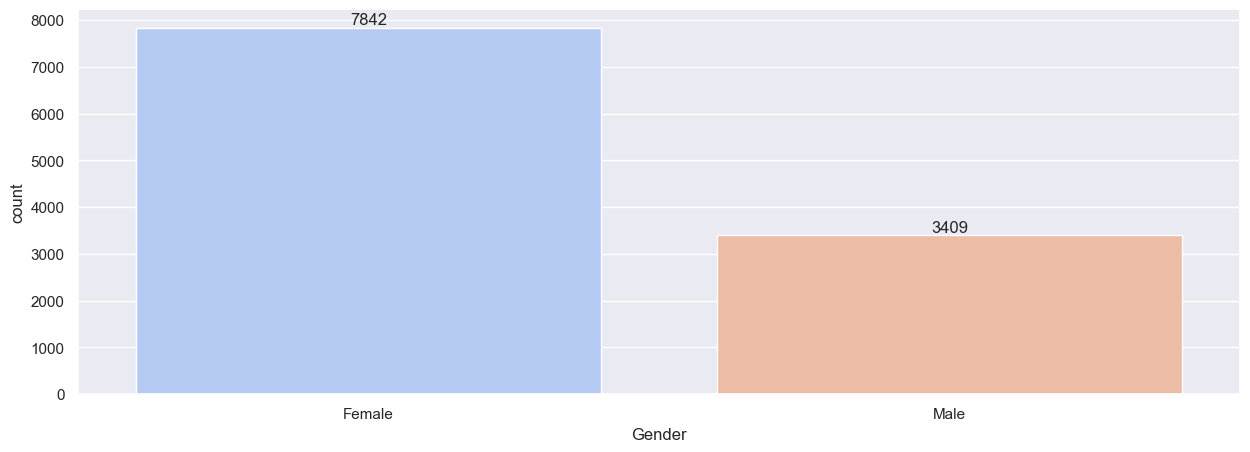

In [252]:
# First i am plotting bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df,hue='Gender' , palette='coolwarm')

for bars in ax.containers:
    ax.bar_label(bars)

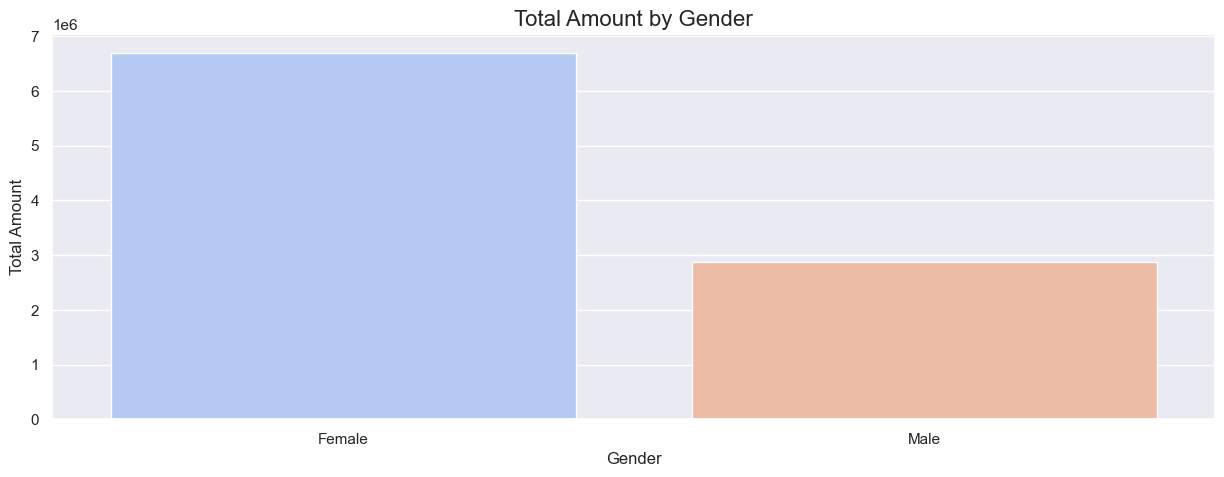

In [251]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, hue = 'Gender' ,palette='coolwarm')
plt.title('Total Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

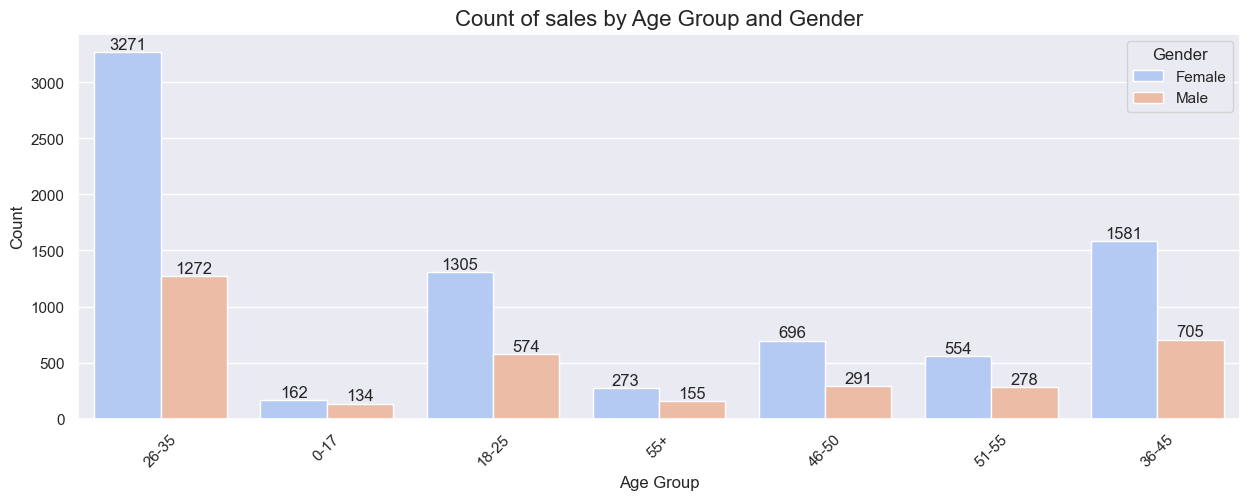

In [250]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette='coolwarm')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of sales by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

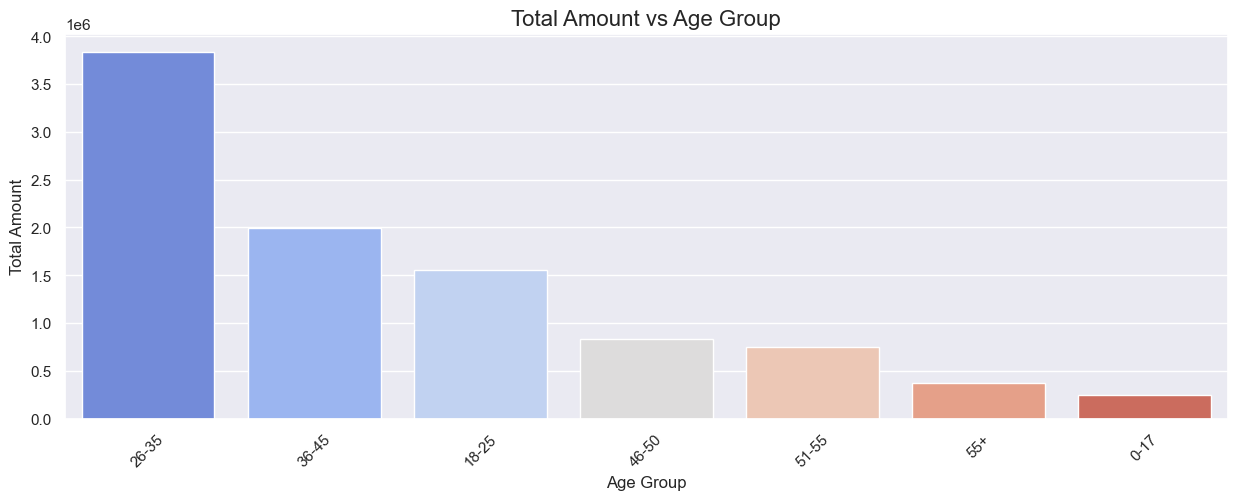

In [249]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,hue= 'Age Group', palette='coolwarm')

# Optional: Add labels and title
plt.title('Total Amount vs Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

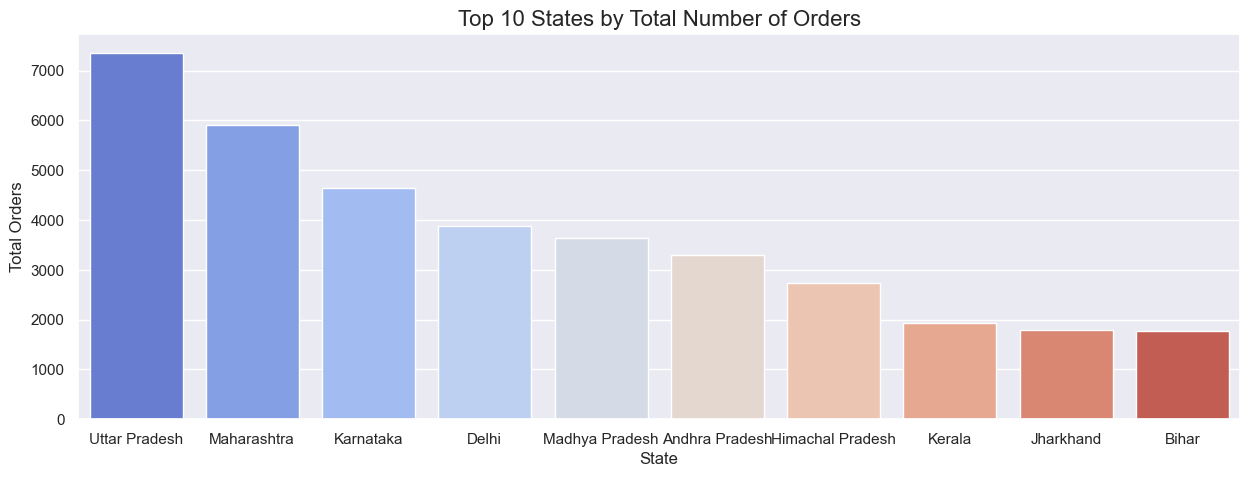

In [248]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', hue='State', palette='coolwarm')
plt.title('Top 10 States by Total Number of Orders', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.show()


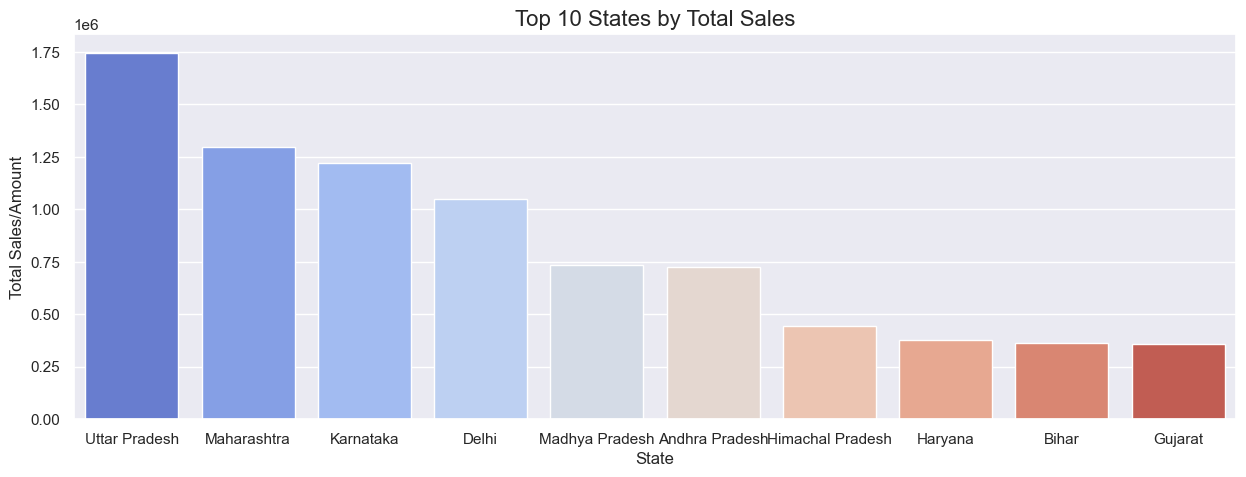

In [247]:
# total amount from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue='State', palette='coolwarm')
plt.title('Top 10 States by Total Sales', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales/Amount', fontsize=12)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

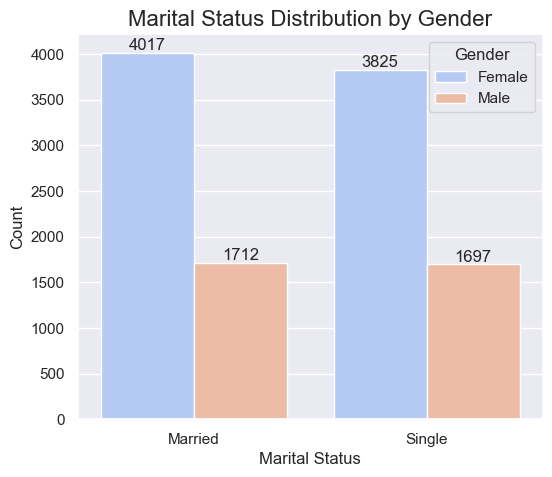

In [245]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue='Gender', palette='coolwarm')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Sales count by marital status distribution and gender', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

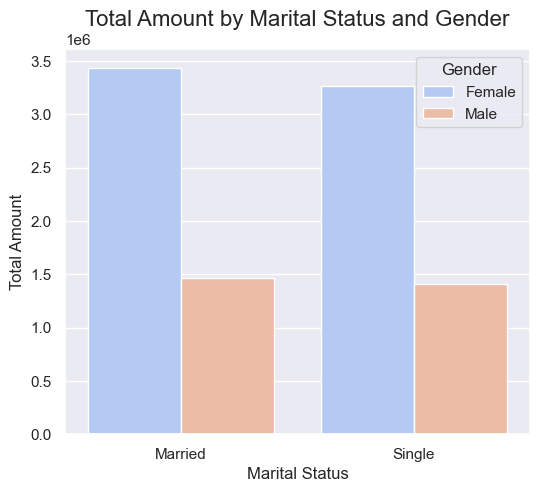

In [244]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette='coolwarm')
plt.title('Total Amount by Marital Status and Gender', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

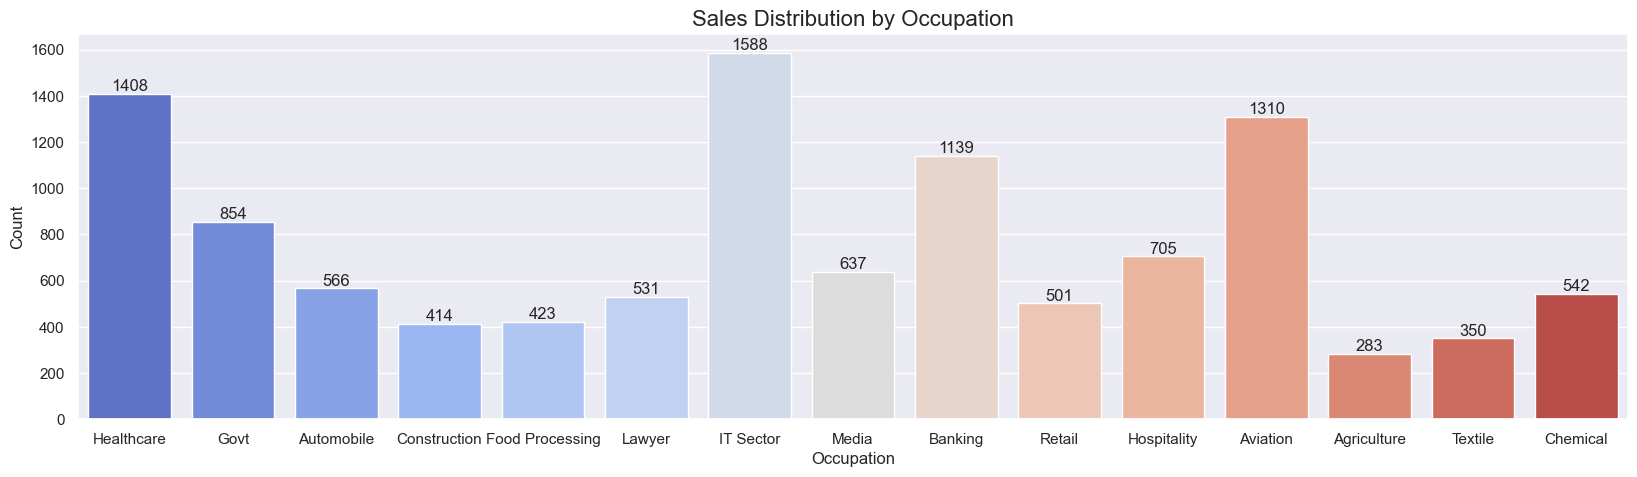

In [243]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df,  hue='Occupation', x='Occupation', palette='coolwarm', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Sales Distribution by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

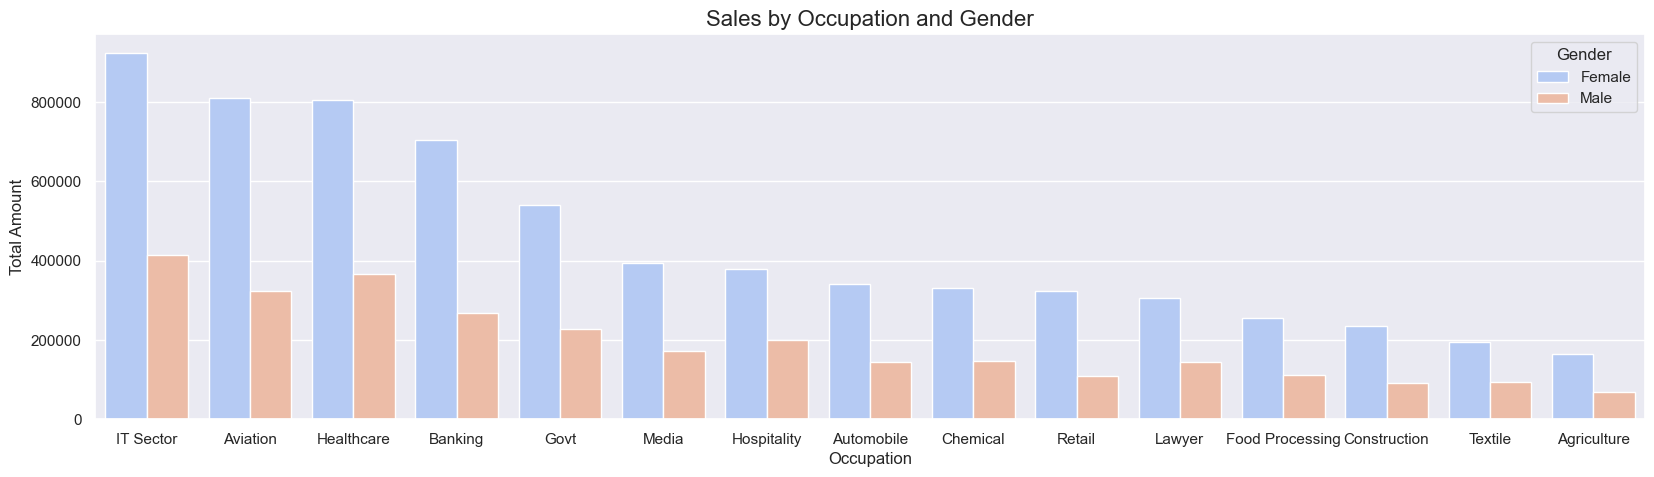

In [233]:
sales_state = df.groupby(['Occupation','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',hue='Gender', palette='coolwarm')

plt.title('Sales by Occupation and Gender', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

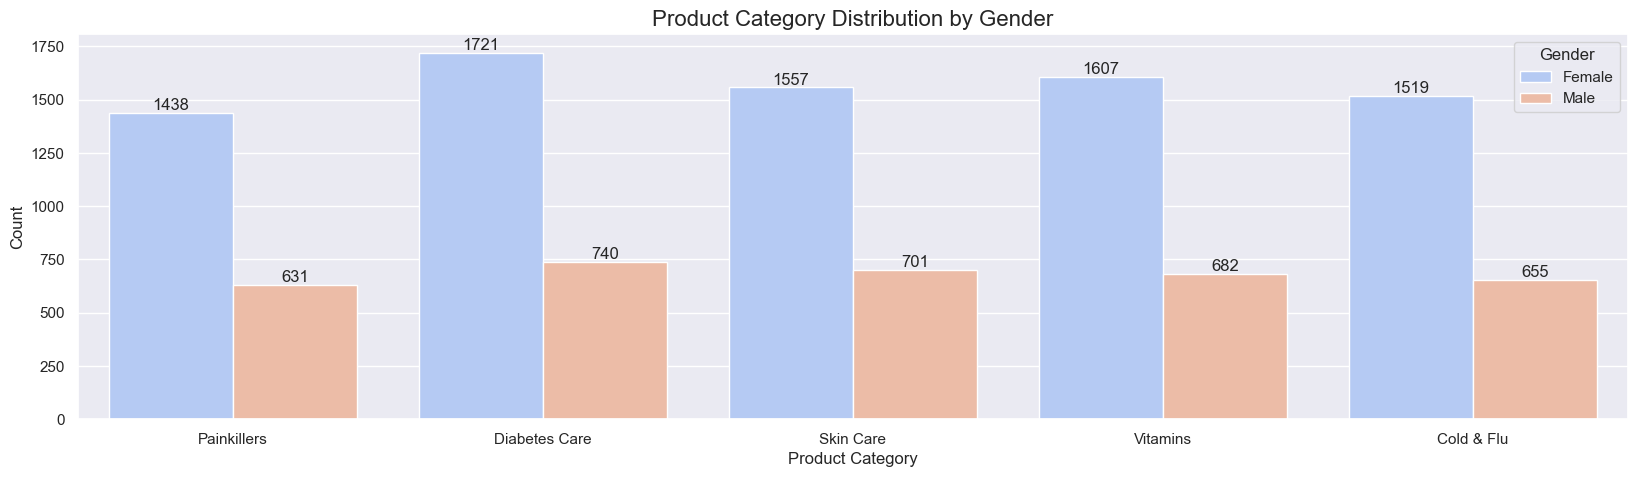

In [227]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category', hue='Gender', palette='coolwarm')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Product Category Distribution by Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

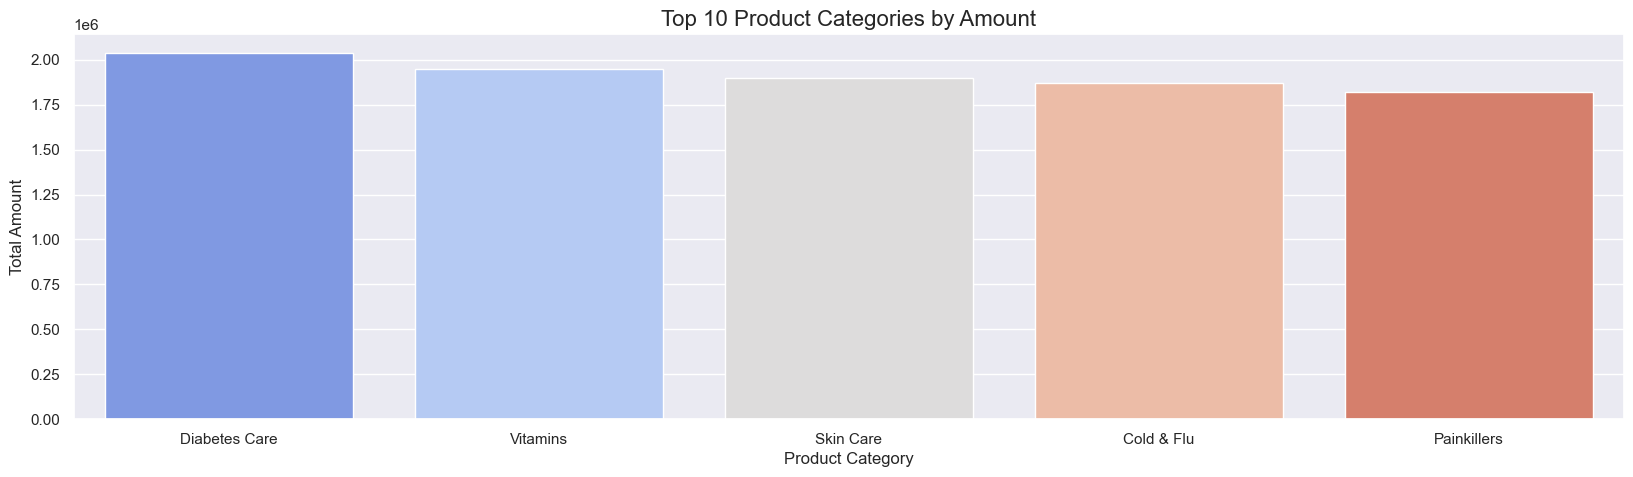

In [228]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount',hue='Product_Category', palette='coolwarm')

plt.title('Top 10 Product Categories by Amount', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

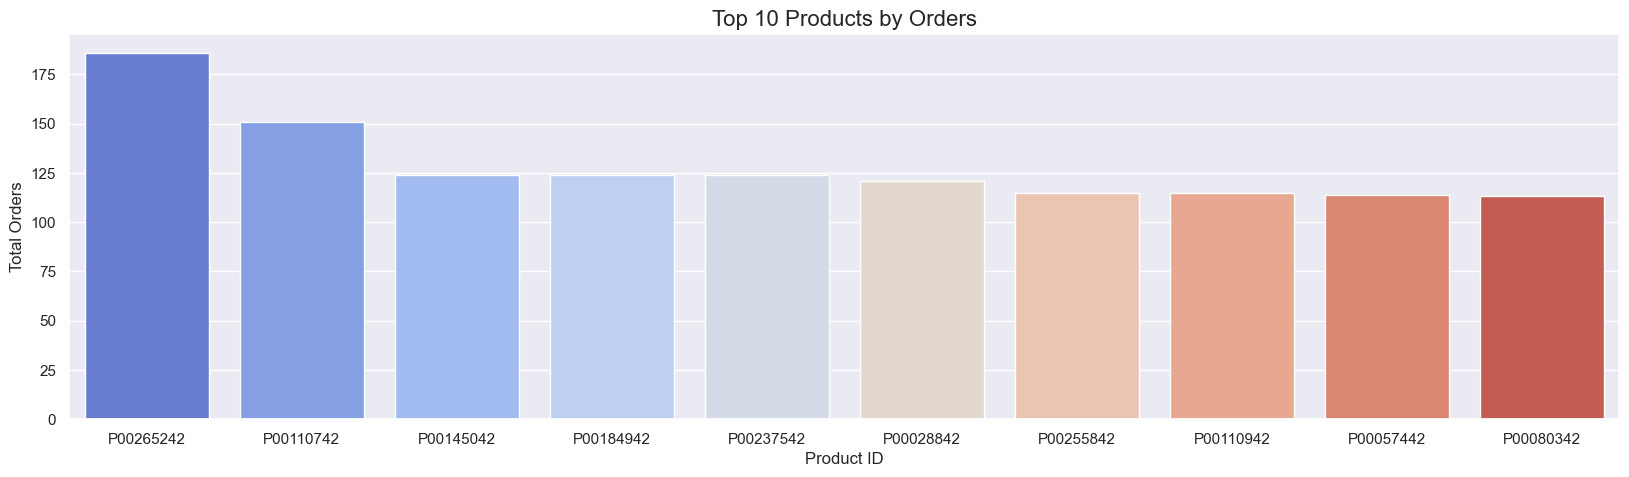

In [229]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_ID', y='Orders', hue='Product_ID', palette='coolwarm')

plt.title('Top 10 Products by Orders', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.show()

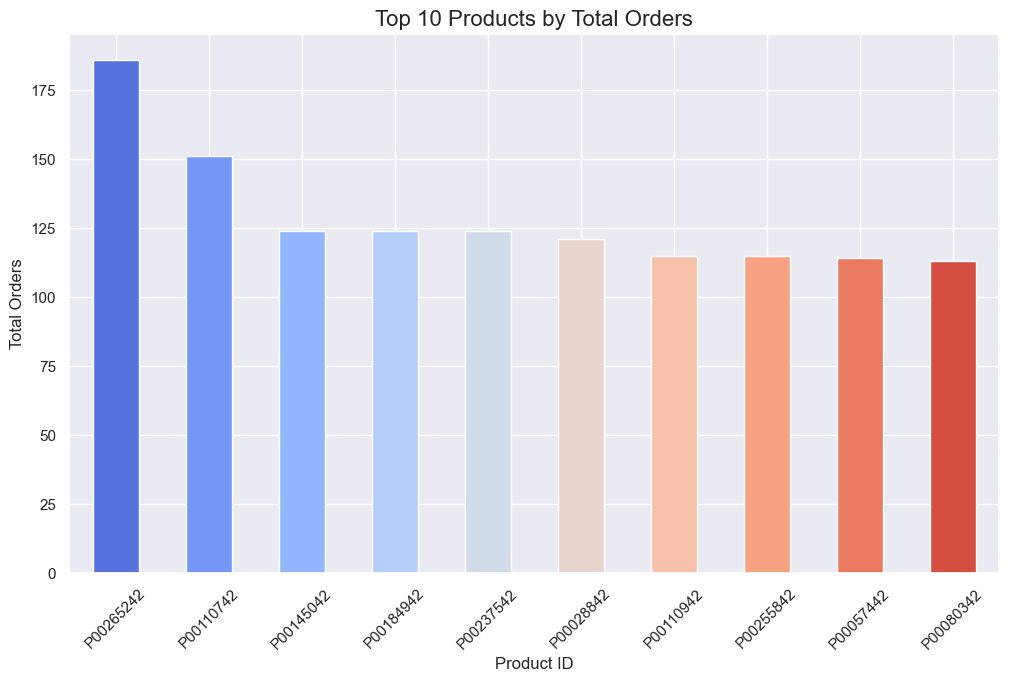

In [221]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', ax=ax1, color=sns.color_palette('coolwarm', n_colors=10))
ax1.set_title('Top 10 Products by Total Orders', fontsize=16)
ax1.set_xlabel('Product ID', fontsize=12)
ax1.set_ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Cart Abandonment Rate Analysis

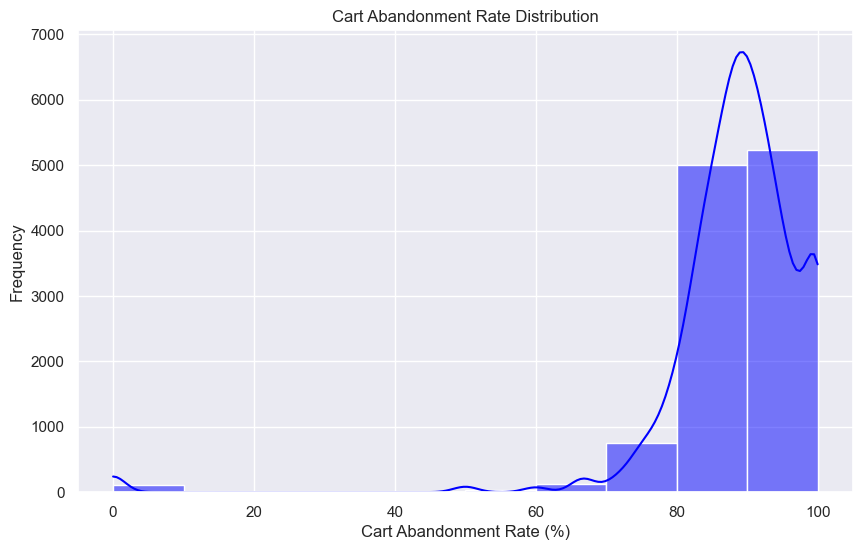

In [219]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cart_Abandonment_Rate'], bins=10, kde=True, color='blue')
plt.title("Cart Abandonment Rate Distribution")
plt.xlabel("Cart Abandonment Rate (%)")
plt.ylabel("Frequency")
plt.show()

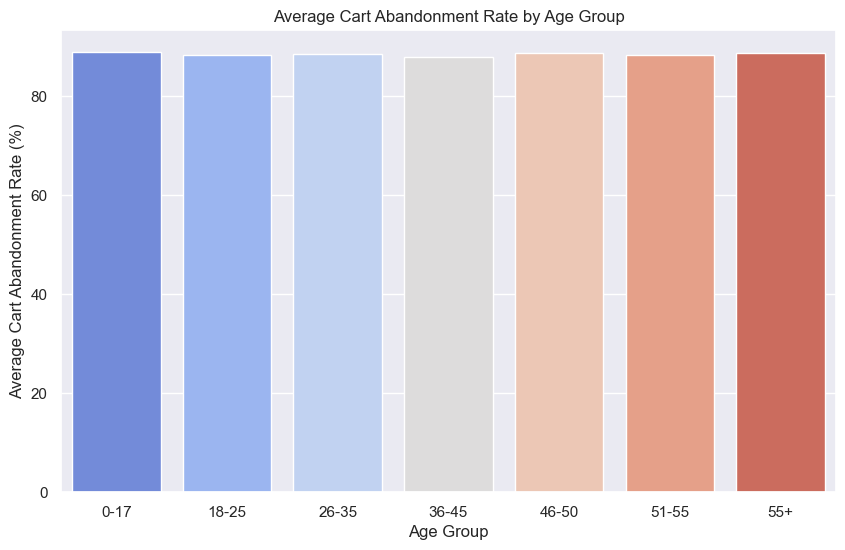

In [205]:
#Average Cart Abandonment Rate by Age Group
age_group_abandonment = df.groupby("Age Group")["Cart_Abandonment_Rate"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_abandonment, x='Age Group', y='Cart_Abandonment_Rate', palette='coolwarm')
plt.title("Average Cart Abandonment Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Cart Abandonment Rate (%)")
plt.show()

### Repeat Buyers Analysis

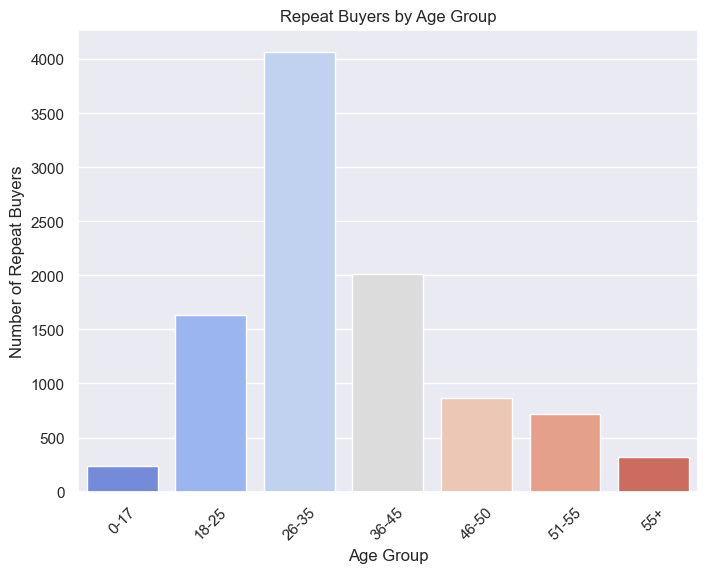

In [215]:
# Grouping by User_ID and counting the number of orders
repeat_buyers = df.groupby('User_ID')['Orders'].count().reset_index()

# Filter customers with more than one order (repeat buyers)
repeat_buyers = repeat_buyers[repeat_buyers['Orders'] > 1]

# Merge with the original dataframe to get demographic details
repeat_buyers_details = pd.merge(repeat_buyers, df, on='User_ID', how='left')

# Group by Age Group and Gender
repeat_buyers_by_age = repeat_buyers_details.groupby('Age Group')['User_ID'].count().reset_index()
repeat_buyers_by_gender = repeat_buyers_details.groupby('Gender')['User_ID'].count().reset_index()

# Visualization for Repeat Buyers by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='User_ID', data=repeat_buyers_by_age,hue='Age Group', palette='coolwarm')
plt.title('Repeat Buyers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Repeat Buyers')
plt.xticks(rotation=45)
plt.show()

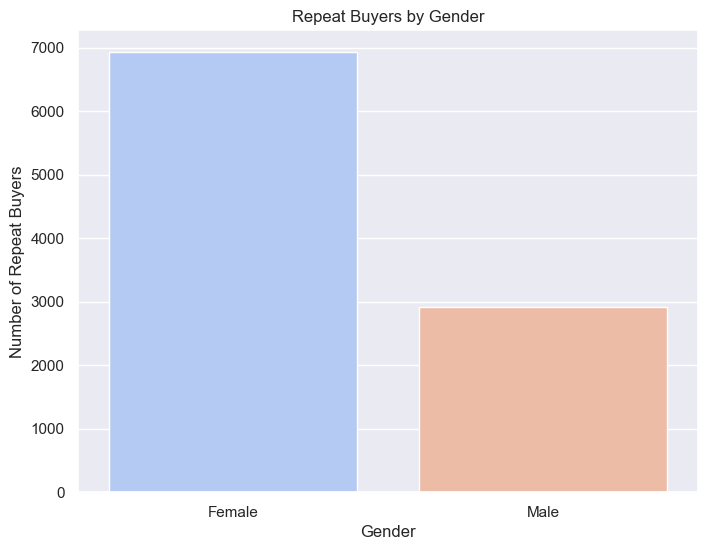

In [217]:
# Visualization for Repeat Buyers by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='User_ID', data=repeat_buyers_by_gender, hue='Gender', palette='coolwarm')
plt.title('Repeat Buyers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Repeat Buyers')
plt.show()

## Conclusion:
### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from 
Diabetes Care
,Painkillers and 
Skin Care*